# **Problem statement**

The aim of this project is to perform an in-depth Exploratory Data Analysis (EDA) on an online retail dataset to uncover meaningful insights about customer behavior, product performance, and sales trends. The dataset contains transactional data for a UK-based online retailer, including details like invoice numbers, product codes, quantities, prices, customer IDs, and countries.

# **The goal is to:**

Understand the structure and quality of the data.

Clean and preprocess the data for analysis.

Identify patterns in purchasing behavior.

Detect and handle outliers.

Analyze product performance and customer segmentation.

Prepare the data for potential modeling or further predictive analytics

# **Importing Libraries**

In [ ]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **Loading the Dataset**

In [ ]:
df=pd.read_csv('/content/online_retail.csv')
df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


# **Basic Data Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [ ]:
df.dtypes

,0
index,int64
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


# **Data Cleaning**

In [ ]:
print("Number of rows =", df.shape[0])
print("\nNumber of features =", df.shape[1])
print("\ndf features =",df.columns.tolist())
print("\nMissing values =", df.isnull().sum().values.sum())
print("\nunique values =", df.nunique())

Number of rows = 541909

Number of features = 9

df features = ['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Missing values = 136534

unique values = index          541909
InvoiceNo       25900
StockCode        4070
Description      4223
Quantity          722
InvoiceDate     23260
UnitPrice        1630
CustomerID       4372
Country            38
dtype: int64


In [ ]:
df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


# **Descriptive Statistics**

In [ ]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.00000,541909.000000,541909.000000,406829.000000
mean,270954.00000,9.552250,4.611114,15287.690570
std,156435.79785,218.081158,96.759853,1713.600303
min,0.00000,-80995.000000,-11062.060000,12346.000000
25%,135477.00000,1.000000,1.250000,13953.000000
50%,270954.00000,3.000000,2.080000,15152.000000
75%,406431.00000,10.000000,4.130000,16791.000000
max,541908.00000,80995.000000,38970.000000,18287.000000


In [ ]:
full_size = df.shape[0]
cleaned_size = df.dropna().shape[0]

df_loss_percentage = (full_size - cleaned_size) / full_size * 100
print(f"\ndf Loss Percentage: {df_loss_percentage:.2f}%")


df Loss Percentage: 24.93%


In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M', errors='coerce')

In [ ]:
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time

df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [ ]:
cancelled_transactions = df[df['InvoiceNo'].str.startswith('C', na=False)]
No_cancelled_transactions = cancelled_transactions.shape[0]

print(f"Number of cancelled transactions: {No_cancelled_transactions}")
cancelled_transactions.head(7)

Number of cancelled transactions: 8905


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time
141,141,C536379,D,Discount,-1,NaT,27.50,14527.0,United Kingdom,NaT,NaT
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,NaT,4.65,15311.0,United Kingdom,NaT,NaT
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,NaT,1.65,17548.0,United Kingdom,NaT,NaT
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,NaT,0.29,17548.0,United Kingdom,NaT,NaT
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,NaT,0.29,17548.0,United Kingdom,NaT,NaT
238,238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,NaT,0.29,17548.0,United Kingdom,NaT,NaT
239,239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,NaT,3.45,17548.0,United Kingdom,NaT,NaT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        406829 non-null  int64         
 1   InvoiceNo    406829 non-null  object        
 2   StockCode    406829 non-null  object        
 3   Description  406829 non-null  object        
 4   Quantity     406829 non-null  int64         
 5   InvoiceDate  234047 non-null  datetime64[ns]
 6   UnitPrice    406829 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      406829 non-null  object        
 9   Date         234047 non-null  datetime64[ns]
 10  Time         234047 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 34.1+ MB


In [ ]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,NaT,2.55,17850.0,United Kingdom,NaT,NaT
1,1,536365,71053,WHITE METAL LANTERN,6,NaT,3.39,17850.0,United Kingdom,NaT,NaT
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,NaT,2.75,17850.0,United Kingdom,NaT,NaT
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,NaT,3.39,17850.0,United Kingdom,NaT,NaT
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,NaT,3.39,17850.0,United Kingdom,NaT,NaT


In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,NaT,2.55,17850.0,United Kingdom,NaT,NaT,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,NaT,3.39,17850.0,United Kingdom,NaT,NaT,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,NaT,2.75,17850.0,United Kingdom,NaT,NaT,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,NaT,3.39,17850.0,United Kingdom,NaT,NaT,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,NaT,3.39,17850.0,United Kingdom,NaT,NaT,20.34


In [ ]:
df[['Quantity','UnitPrice','TotalPrice']].describe()

,Quantity,UnitPrice,TotalPrice
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,20.401854
std,248.693370,69.315162,427.591718
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.200000
50%,5.000000,1.950000,11.100000
75%,12.000000,3.750000,19.500000
max,80995.000000,38970.000000,168469.600000


In [ ]:
df.describe()

,index,Quantity,InvoiceDate,UnitPrice,CustomerID,Date,TotalPrice
count,406829.000000,406829.000000,234047,406829.000000,406829.000000,234047,406829.000000
mean,278048.159318,12.061303,2011-07-17 10:13:11.405914112,3.460471,15287.690570,2011-07-16 20:58:30.617952768,20.401854
min,0.000000,-80995.000000,2010-12-13 09:02:00,0.000000,12346.000000,2010-12-13 00:00:00,-168469.600000
25%,147749.000000,2.000000,2011-04-18 10:55:00,1.250000,13953.000000,2011-04-18 00:00:00,4.200000
50%,284435.000000,5.000000,2011-07-31 12:05:00,1.950000,15152.000000,2011-07-31 00:00:00,11.100000
75%,409528.000000,12.000000,2011-10-21 13:46:00,3.750000,16791.000000,2011-10-21 00:00:00,19.500000
max,541908.000000,80995.000000,2011-11-30 17:42:00,38970.000000,18287.000000,2011-11-30 00:00:00,168469.600000
std,152744.019884,248.693370,NaN,69.315162,1713.600303,NaN,427.591718


In [ ]:
import numpy as np
import pandas as pd

# Calculate the Z-score for the 'TotalPrice' column
df['TotalPrice_Zscore'] = (df['TotalPrice'] - df['TotalPrice'].mean()) / df['TotalPrice'].std()

# Identify outliers
outliers = df[(df['TotalPrice_Zscore'] > 3) | (df['TotalPrice_Zscore'] < -3)]

print(outliers) #to see the outliers

         index InvoiceNo StockCode                     Description  Quantity  \
869        870    536477     21137        BLACK RECORD COVER FRAME       480   
3314      4505    536785     22423        REGENCY CAKESTAND 3 TIER       144   
3741      4946    536830     21915          RED  HARMONICA IN BOX       1400   
4516      6607    536970     22423        REGENCY CAKESTAND 3 TIER       120   
7913     10205    537235     22622  BOX OF VINTAGE ALPHABET BLOCKS       156   
...        ...       ...       ...                             ...       ...   
404459  537883    581375     21137        BLACK RECORD COVER FRAME       960   
405989  540061    581457     23543             WALL ART KEEP CALM        698   
405991  540063    581457     23553     LANDMARK FRAME CAMDEN TOWN        120   
406349  540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   
406350  540422   C581484     23843     PAPER CRAFT , LITTLE BIRDIE    -80995   

       InvoiceDate  UnitPrice  Customer

In [ ]:
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
#(Similar logic for Time of Day categorization)

In [ ]:
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_spending.rename(columns={'TotalPrice': 'TotalSpending'}, inplace=True)
df = df.merge(customer_spending, on='CustomerID', how='left')
#(Similar logic for other customer segmentation features)

In [ ]:
customer_spending

,CustomerID,TotalSpending
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [ ]:
# Checking unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}': {df[col].nunique()}")

Unique values in 'InvoiceNo': 22190
Unique values in 'StockCode': 3684
Unique values in 'Description': 3896
Unique values in 'Country': 37
Unique values in 'Time': 731


In [ ]:
df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,TotalPrice,TotalPrice_Zscore,Month,DayOfWeek,IsWeekend,TotalSpending
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,NaT,2.55,17850.0,United Kingdom,NaT,NaT,15.30,-0.011932,NaN,NaN,0,5288.63
1,1,536365,71053,WHITE METAL LANTERN,6,NaT,3.39,17850.0,United Kingdom,NaT,NaT,20.34,-0.000145,NaN,NaN,0,5288.63
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,NaT,2.75,17850.0,United Kingdom,NaT,NaT,22.00,0.003738,NaN,NaN,0,5288.63
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,NaT,3.39,17850.0,United Kingdom,NaT,NaT,20.34,-0.000145,NaN,NaN,0,5288.63
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,NaT,3.39,17850.0,United Kingdom,NaT,NaT,20.34,-0.000145,NaN,NaN,0,5288.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,NaT,0.85,12680.0,France,NaT,NaT,10.20,-0.023859,NaN,NaN,0,862.81
406825,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,NaT,2.10,12680.0,France,NaT,NaT,12.60,-0.018246,NaN,NaN,0,862.81
406826,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,NaT,4.15,12680.0,France,NaT,NaT,16.60,-0.008891,NaN,NaN,0,862.81
406827,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,NaT,4.15,12680.0,France,NaT,NaT,16.60,-0.008891,NaN,NaN,0,862.81


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['Country']= label_encoder.fit_transform(df['Country'])

<ipython-input-57-f9ecc8f40bb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country']= label_encoder.fit_transform(df['Country'])


In [ ]:
label_encoder = LabelEncoder()
# Assuming 'Country' is the categorical column you want to encode:
df['CountrDescription'] = label_encoder.fit_transform(df['Country'])

<ipython-input-43-8a5ffab85604>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CountrDescription'] = label_encoder.fit_transform(df['Country'])


In [ ]:
df

,Quantity,UnitPrice,TotalPrice,Country,CountrDescription
0,6,2.55,15.30,35,35
1,6,3.39,20.34,35,35
2,8,2.75,22.00,35,35
3,6,3.39,20.34,35,35
4,6,3.39,20.34,35,35
...,...,...,...,...,...
406824,12,0.85,10.20,13,13
406825,6,2.10,12.60,13,13
406826,4,4.15,16.60,13,13
406827,4,4.15,16.60,13,13


# ***Data Scaling***

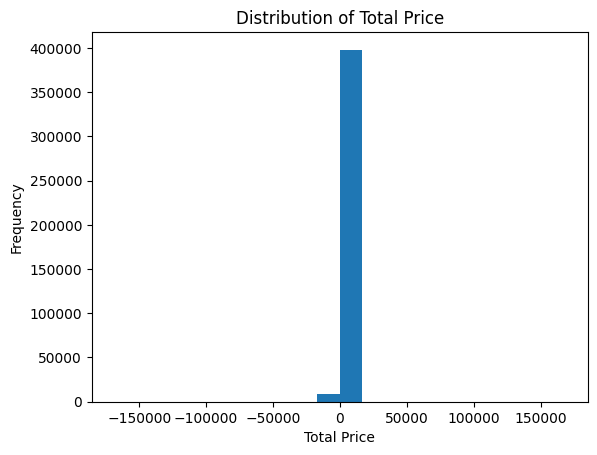

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['TotalPrice'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Distribution of Total Price')
plt.show()

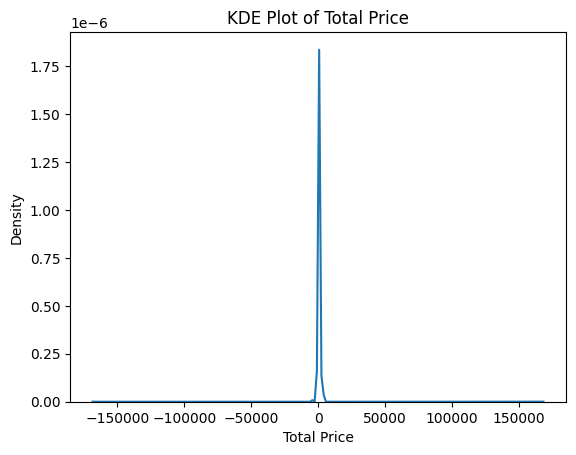

In [ ]:
import seaborn as sns
sns.kdeplot(df['TotalPrice'])
plt.xlabel('Total Price')
plt.ylabel('Density')
plt.title('KDE Plot of Total Price')
plt.show()

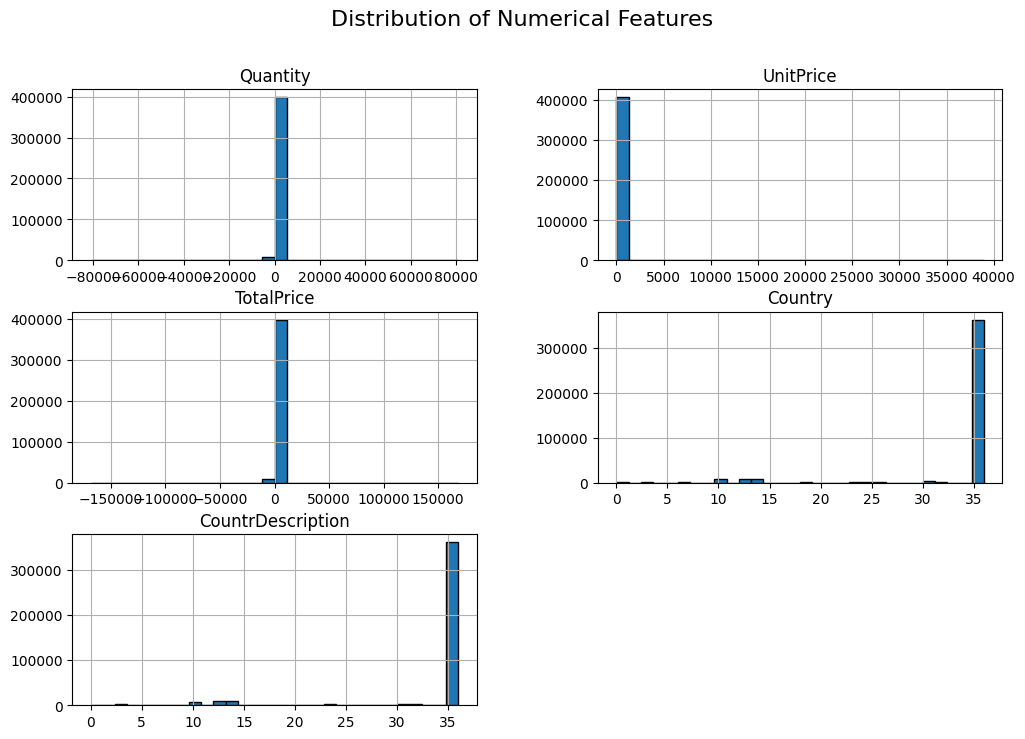

In [ ]:
# Histograms for numerical columns
df.select_dtypes(include=['number']).hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

In [ ]:
df['Country'].dtype

dtype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Quantity           406829 non-null  int64  
 1   UnitPrice          406829 non-null  float64
 2   TotalPrice         406829 non-null  float64
 3   Country            406829 non-null  int64  
 4   CountrDescription  406829 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 15.5 MB


# **Outlier Detection**

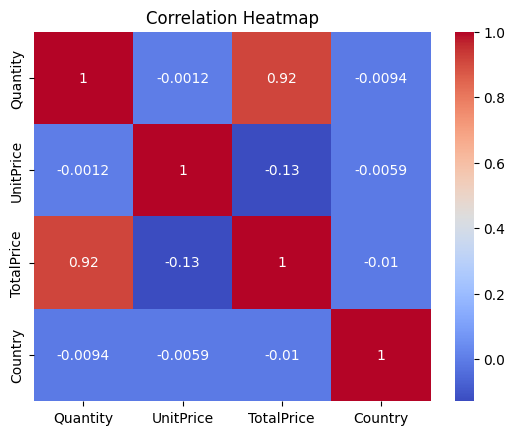

In [ ]:
df=df[['Quantity', 'UnitPrice', 'TotalPrice','Country']]

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# # Replace 'Column_Name' with an actual categorical column name from your dfset
# # For example, if 'Description' is a categorical column, use:
# plt.figure(figsize=(12,6))
# df['Description'].value_counts().nlargest(10).plot(kind='bar', color='skyblue', edgecolor="black")
# plt.title("Top 10 Most Frequent Categories")
# plt.xlabel("Category")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.show()

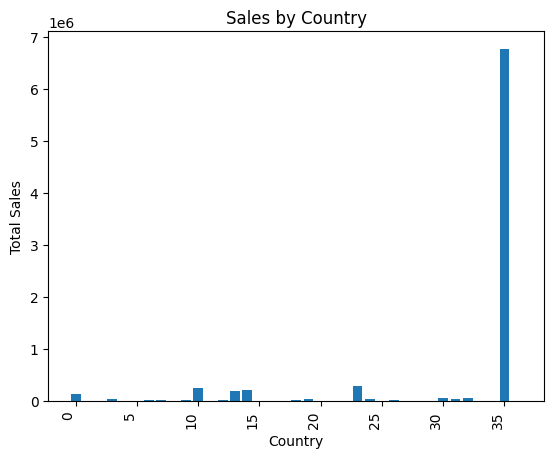

In [ ]:
sales_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()
plt.bar(sales_by_country['Country'], sales_by_country['TotalPrice'])
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Sales by Country')
plt.xticks(rotation=90, ha='right')
plt.show()

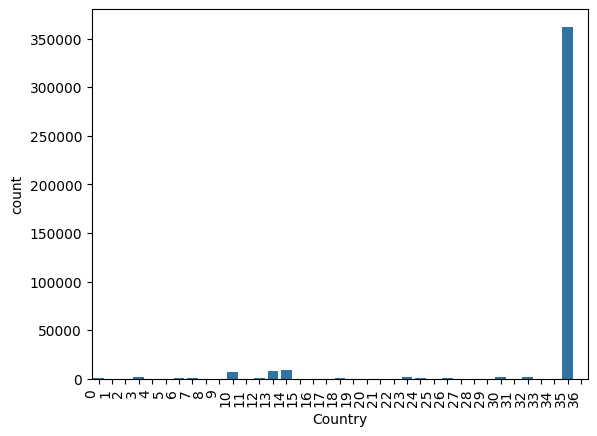

In [ ]:
sns.countplot(x='Country', data=df)
plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
# df['Date'] = pd.to_datetime(df['InvoiceDate']).dt.date
# daily_sales = df.groupby('Date')['TotalPrice'].sum().reset_index()
# plt.plot(daily_sales['Date'], daily_sales['TotalPrice'])
# plt.xlabel('Date')
# plt.ylabel('Total Sales')
# plt.title('Daily Sales Trend')
# plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your dfFrame and 'TotalPrice' is your target variable
# Select features (X) and target variable (y)
X = df[['Quantity', 'UnitPrice']]  # Replace with your desired features
y = df['TotalPrice']

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3524.251266659292
R-squared: 0.4479360339324634
